loading tha data

In [4]:
import pandas as pd 
url_data = "/Users/lait-zet/Desktop/RetentionAI-Employee-Attrition-Predictor-HR-Assistant/ml/data/data.csv"

df = pd.read_csv(url_data)
df.info()
data = df
# df.duplicated().sum()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

split the data between categoriel and numerical

In [5]:
def is_numeric(df):
    return df.select_dtypes(include=['int64'])
def is_categories(df):
    return df.select_dtypes(exclude=['int64'])
is_numeric = is_numeric(df)
is_categories = is_categories(df)
numeric = is_numeric.drop(columns=["EmployeeCount", "StandardHours","Education","EnvironmentSatisfaction","JobInvolvement",
 "JobSatisfaction","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"])
numeric.info()
numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   EmployeeNumber           1470 non-null   int64
 4   HourlyRate               1470 non-null   int64
 5   JobLevel                 1470 non-null   int64
 6   MonthlyIncome            1470 non-null   int64
 7   MonthlyRate              1470 non-null   int64
 8   NumCompaniesWorked       1470 non-null   int64
 9   PercentSalaryHike        1470 non-null   int64
 10  StockOptionLevel         1470 non-null   int64
 11  TotalWorkingYears        1470 non-null   int64
 12  TrainingTimesLastYear    1470 non-null   int64
 13  YearsAtCompany           1470 non-null   int64
 14  YearsInCurrentRole       1470 non-null   int64
 15  Year

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5
1,49,279,8,2,61,2,5130,24907,1,23,1,10,3,10,7,1,7
2,37,1373,2,4,92,1,2090,2396,6,15,0,7,3,0,0,0,0
3,33,1392,3,5,56,1,2909,23159,1,11,0,8,3,8,7,3,0
4,27,591,2,7,40,1,3468,16632,9,12,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2,2571,12290,4,17,1,17,3,5,2,0,3
1466,39,613,6,2062,42,3,9991,21457,4,15,1,9,5,7,7,1,7
1467,27,155,4,2064,87,2,6142,5174,1,20,1,6,0,6,2,0,3
1468,49,1023,2,2065,63,2,5390,13243,2,14,0,17,3,9,6,0,8


Visulisation

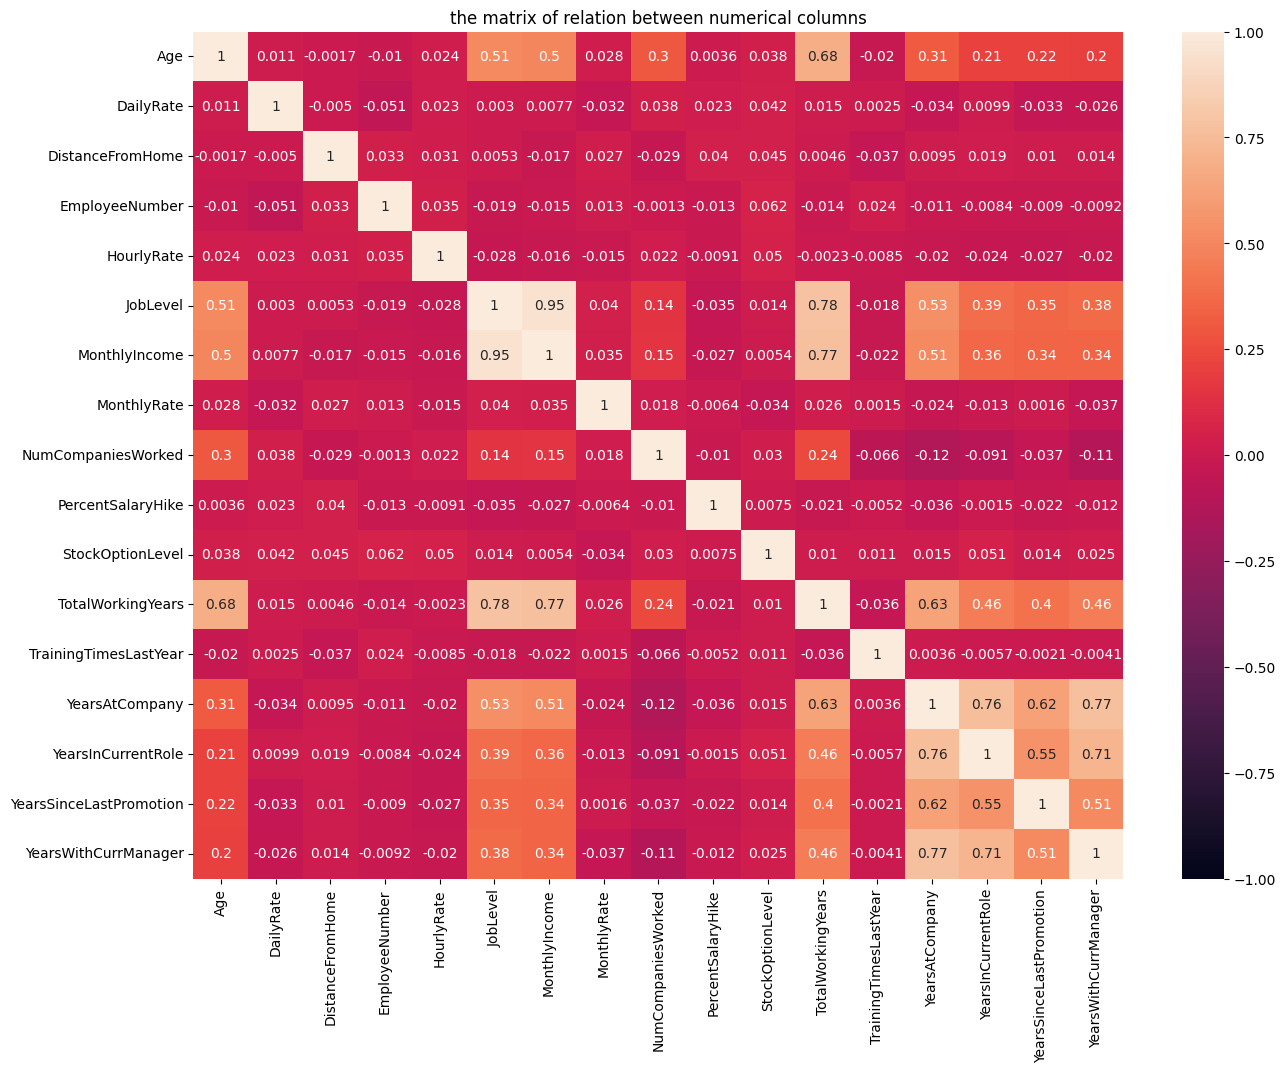

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = numeric.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True)
plt.title("the matrix of relation between numerical columns")
plt.show()


Visulation des columns categoriels

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data = data, palette='husl')


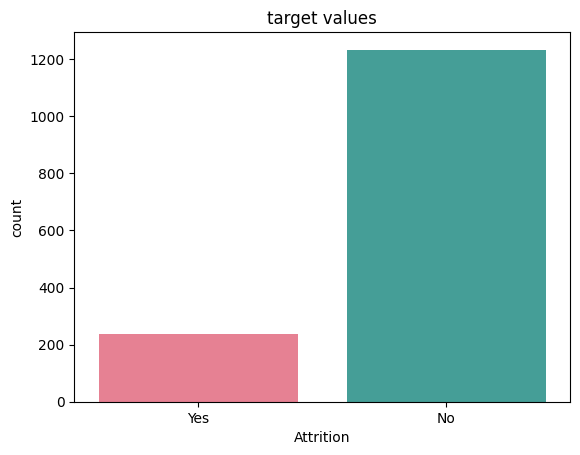

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


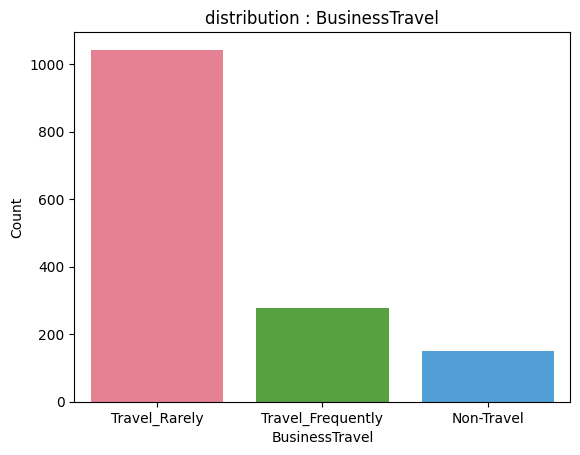

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


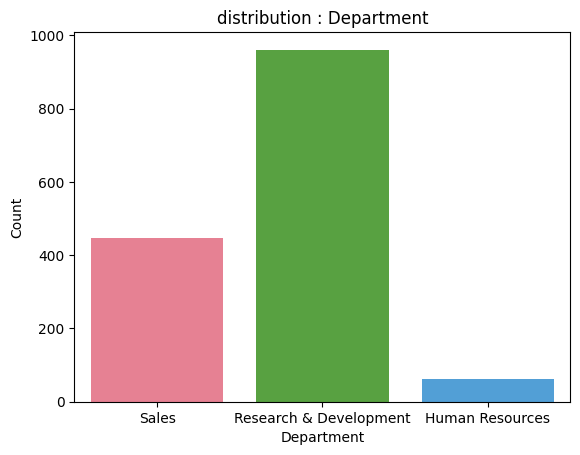

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


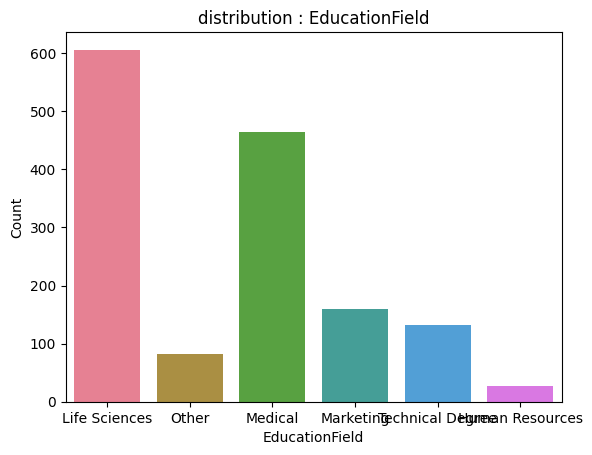

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


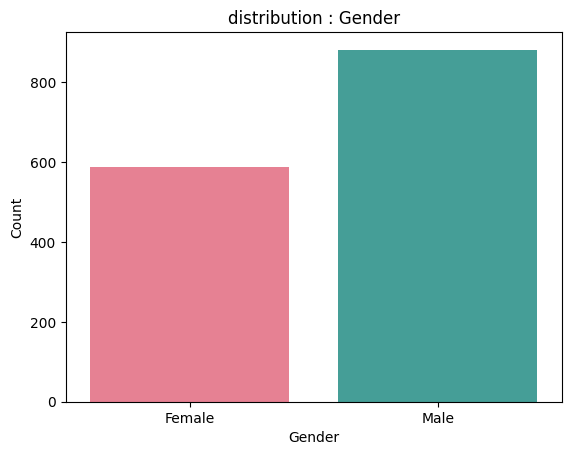

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


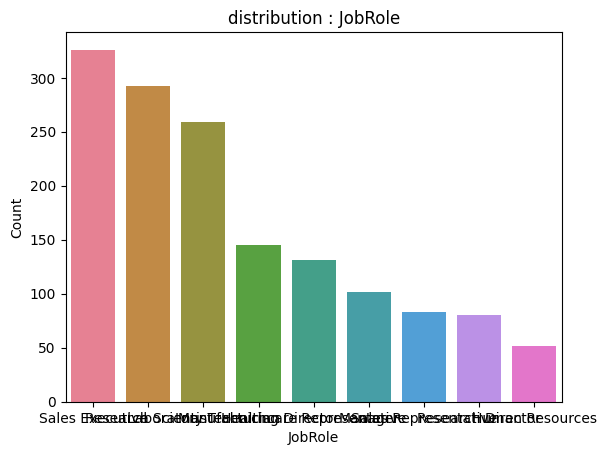

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


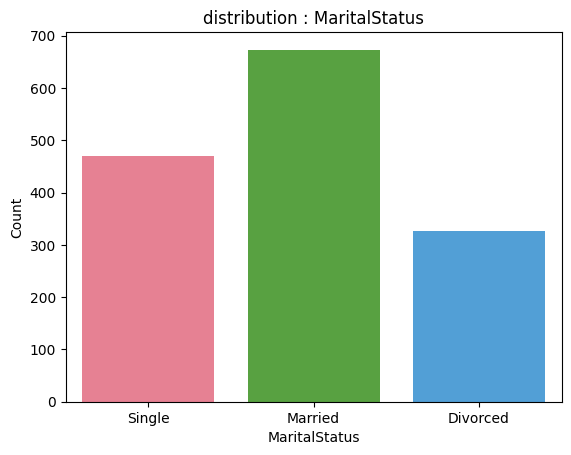

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


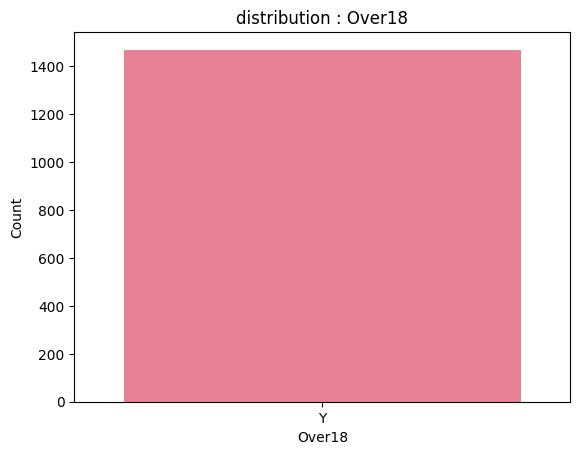

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


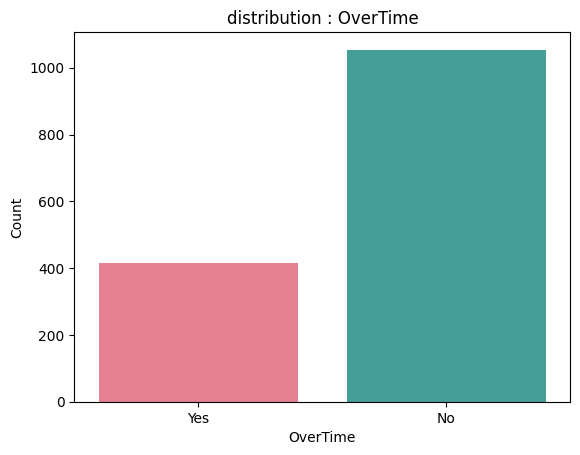

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


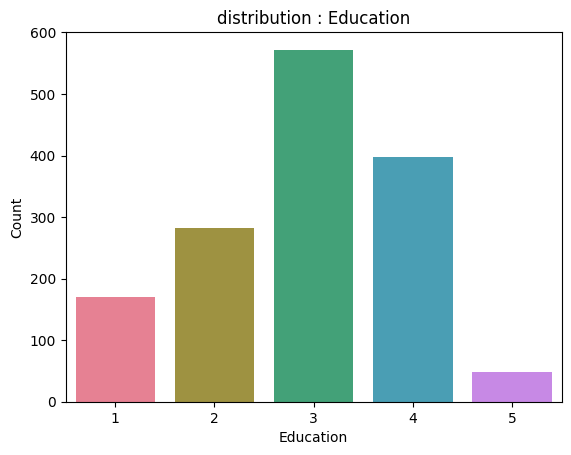

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


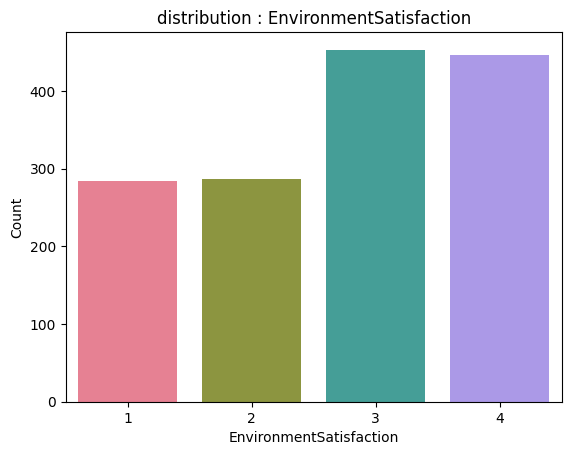

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


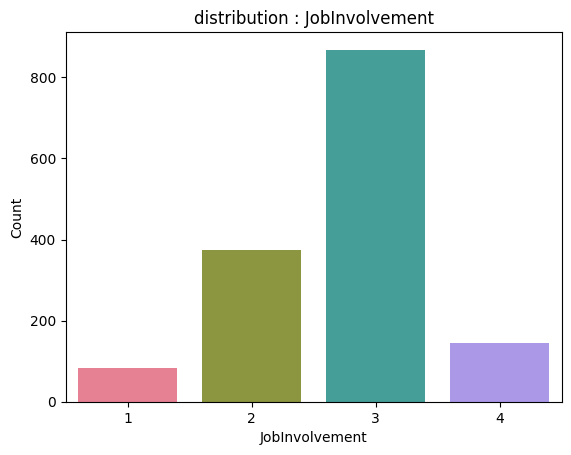

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


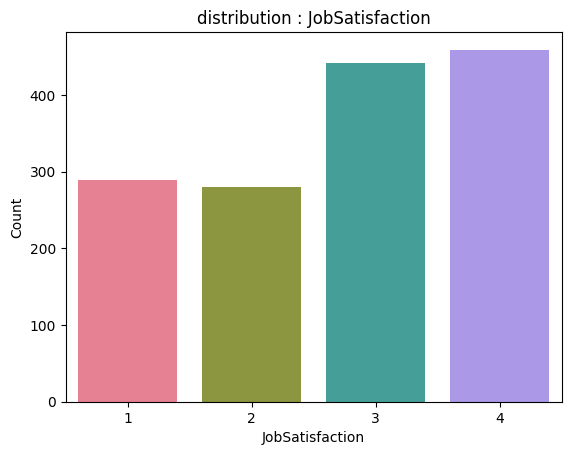

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


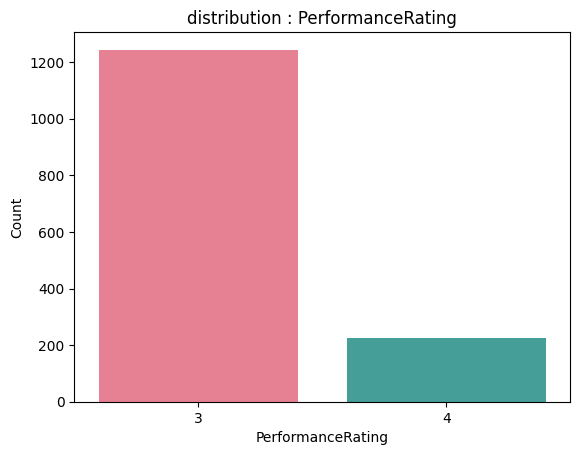

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


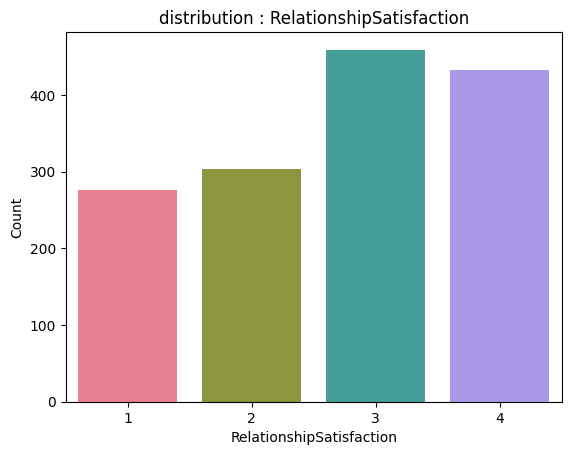

/var/folders/34/r9gx_24s3cn901gzyz1dpgm80000gn/T/ipykernel_9483/2411536157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = data , palette='husl')


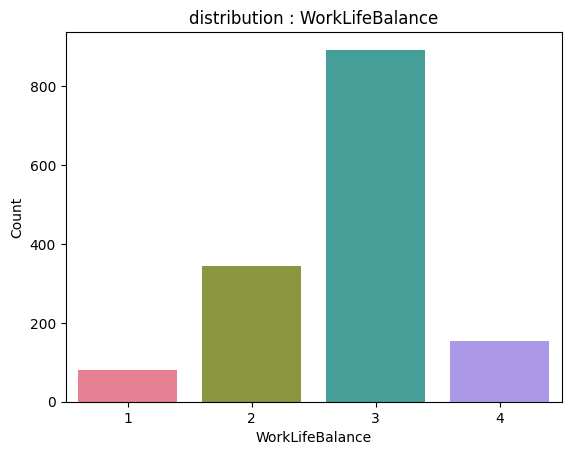

In [7]:
# is_categories.drop(columns=["Attrition"])
categories = is_categories.drop(columns=["Attrition"])
# categories.info()
extra_cols = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobSatisfaction",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "WorkLifeBalance"
]
categories2 = df[extra_cols]
categories = categories.join(categories2)

target = data["Attrition"]
sns.countplot(x=target, data = data, palette='husl')
plt.title("target values")
plt.xlabel("Attrition")
plt.ylabel("count")
plt.show()


for col in categories:
    sns.countplot(x = col , data = data , palette='husl')
    plt.title(f"distribution : {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [8]:
last_categorie = categories.drop(columns=["Over18"])
last_numeric = numeric.drop(columns=["DailyRate","DistanceFromHome","EmployeeNumber","HourlyRate","MonthlyRate","PercentSalaryHike",
                                     "StockOptionLevel","TrainingTimesLastYear"])
last_categorie
last_numeric

,Age,JobLevel,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,5993,8,8,6,4,0,5
1,49,2,5130,1,10,10,7,1,7
2,37,1,2090,6,7,0,0,0,0
3,33,1,2909,1,8,8,7,3,0
4,27,1,3468,9,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1465,36,2,2571,4,17,5,2,0,3
1466,39,3,9991,4,9,7,7,1,7
1467,27,2,6142,1,6,6,2,0,3
1468,49,2,5390,2,17,9,6,0,8


Visulation box plot

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
import joblib

X = data.drop(columns=["DailyRate","DistanceFromHome","EmployeeNumber","HourlyRate","MonthlyRate","PercentSalaryHike",
"StockOptionLevel","TrainingTimesLastYear","Over18","Attrition","EmployeeCount", "StandardHours"])
y = data["Attrition"]
le = LabelEncoder()
Y = le.fit_transform(y)   

proccessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), last_numeric.columns),
        ("cat", OneHotEncoder(), last_categorie.columns)
    ]
)

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

pipline = Pipeline(steps=[
    ('preprocessor' , proccessor),
    ("model", RandomForestClassifier())
])
random_forest_params = {
    "model__n_estimators" : [100, 200, 300],
    "model__max_depth" : [5, 10, 15],
    "model__min_samples_split" : [2, 5, 10]
}

forest_grid = GridSearchCV(
    estimator=pipline,
    param_grid=random_forest_params,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    )
forest_grid.fit(x_train , y_train)
best_forest_model = forest_grid.best_estimator_

y_pred = best_forest_model.predict(x_test)
recall = recall_score(y_test, y_pred)
print(f"Recall Score of the best Random Forest model: {recall}")

Recall Score of the best Random Forest model: 0.10256410256410256


use the smote now 

In [10]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipline_smote = Pipeline(steps=[
    ('preprocessor' , proccessor),
    ('smote', SMOTE()),
    ("model", RandomForestClassifier())
])

grid_smote = GridSearchCV(
    estimator=pipline_smote,
    param_grid=random_forest_params,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    )
grid_smote.fit(x_train , y_train)
best_forest_model_smote = grid_smote.best_estimator_

pre_smote = best_forest_model_smote.predict(x_test)
recall_smote = recall_score(y_test, pre_smote)
print(recall_smote)

0.2564102564102564


Load the model and test it

In [11]:
from sklearn.linear_model import LogisticRegression
piplineLogistic = Pipeline(steps=[
    ('preprocessor' , proccessor),
    ("model", LogisticRegression())
])
logisticparams = {
    "model__C" : [0.01, 0.1, 1, 10, 100],
    "model__penalty" : ['l1', 'l2'],
    "model__solver" : ['liblinear']
}
logistic_grid = GridSearchCV(
    estimator=piplineLogistic,
    param_grid=logisticparams,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    )
logistic_grid.fit(x_train , y_train)
best_l_model = logistic_grid.best_estimator_

y_pred_logistic = best_l_model.predict(x_test)
recall_logistic = recall_score(y_test, y_pred_logistic)
print(recall_logistic)

0.38461538461538464


In [12]:
pipline_l_smote = Pipeline(steps=[
    ('preprocessor' , proccessor),
    ('smote', SMOTE()),
    ("model", LogisticRegression())
])
logistic_grid_smote = GridSearchCV(
    estimator=pipline_l_smote,
    param_grid=logisticparams,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    )
logistic_grid_smote.fit(x_train , y_train)
best_logistic_model_smote = logistic_grid_smote.best_estimator_

y_pred_logistic_smote = best_logistic_model_smote.predict(x_test)
recall_logistic_smote = recall_score(y_test, y_pred_logistic_smote)
print(f"Recall Score of the best Logistic Regression model with SMOTE: {recall_logistic_smote}")


# joblib.dump(best_forest_model_smote, 'best_forest_model_smote.pkl')
joblib.dump(best_logistic_model_smote, 'model_predictor.pkl')


Recall Score of the best Logistic Regression model with SMOTE: 0.6153846153846154


['model_predictor.pkl']

In [13]:
mode_smote = joblib.load('/Users/lait-zet/Desktop/RetentionAI-Employee-Attrition-Predictor-HR-Assistant/ml/model_predictor.pkl')

data_sample = {
  "Age": 41,
  "BusinessTravel": "Travel_Rarely",
  "Department": "Sales",
  "Education": 1,
  "EducationField": "Life Sciences",
  "EnvironmentSatisfaction": 2,
  "Gender": "Female",
  "JobInvolvement": 3,
  "JobLevel": 2,
  "JobRole": "Sales Executive",
  "JobSatisfaction": 4,
  "MaritalStatus": "Single",
  "MonthlyIncome": 5993,
  "NumCompaniesWorked": 8,
  "OverTime": "Yes",
  "PerformanceRating": 3,
  "RelationshipSatisfaction": 1,
  "TotalWorkingYears": 8,
  "WorkLifeBalance": 1,
  "YearsAtCompany": 6,
  "YearsInCurrentRole": 4,
  "YearsSinceLastPromotion": 0,
  "YearsWithCurrManager": 5
}

data_df = pd.DataFrame([data_sample])
prediction = mode_smote.predict(data_df)
proba = mode_smote.predict_proba(data_df)
prediction = le.inverse_transform(prediction)
print(prediction[0])
print(proba[0][1])


Yes
0.7326455014178131


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


prediction = knn.predict(X_test)